# 라이브러리 불러오기

In [1]:
from urllib import request
import requests
from tqdm import tqdm
import json
import time
from haversine import haversine
from plotly.subplots import make_subplots
import sys
import numpy as np
import pandas as pd
import plotly.express as px
from datetime import datetime
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import plotly.figure_factory as ff
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # 한글표시 (window)
plt.rc("axes", unicode_minus=False) # x,y축 (-)부호 표시
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
import seaborn as sns
import folium
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.options.display.max_columns = 39
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
%matplotlib inline
from sklearn.metrics import r2_score
from fbprophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from catboost import CatBoostRegressor
import keras.models
from keras.models import Sequential
from keras.layers import LSTM
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# 개념정리

- 동해 평균수심 : 1,500m 이상(깊은편)
- 표층, 심층의 해수가 교환되는 대류작용(반시계 방향)

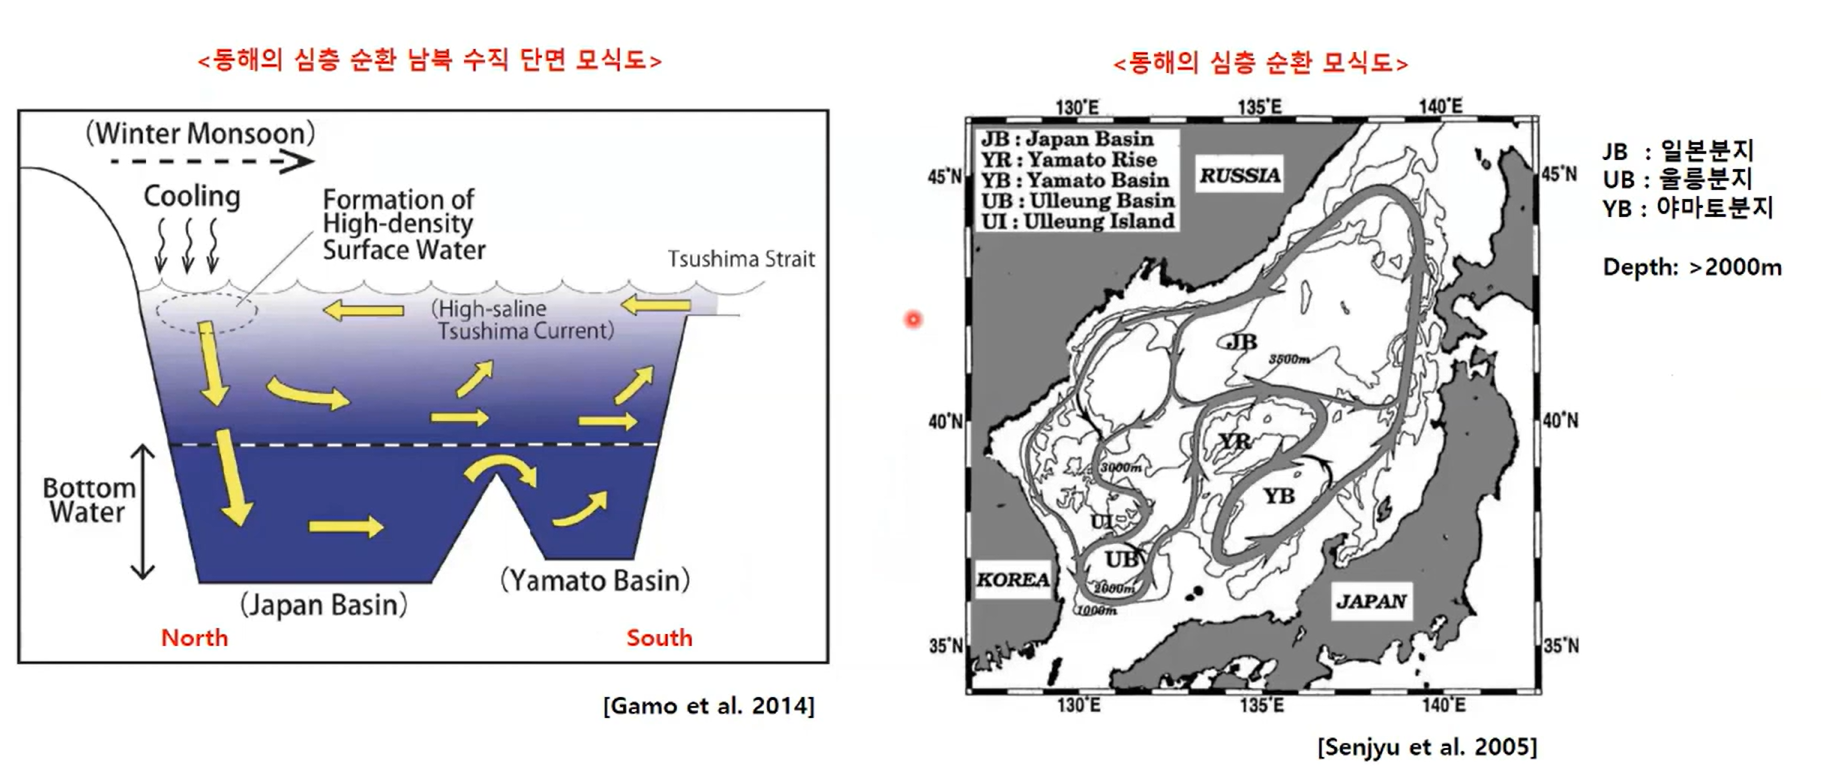
* 동해북부에서 차가운 공기를 만나 <font color=red>표층수가 냉각</font>됨 (염분 방출, 밀도가 높아짐) -> 심층수로 가라앉게됨
* JB, UB, YB = 2,000m 이상의 깊고 평평한 곳
* 반시계 방향으로 순환

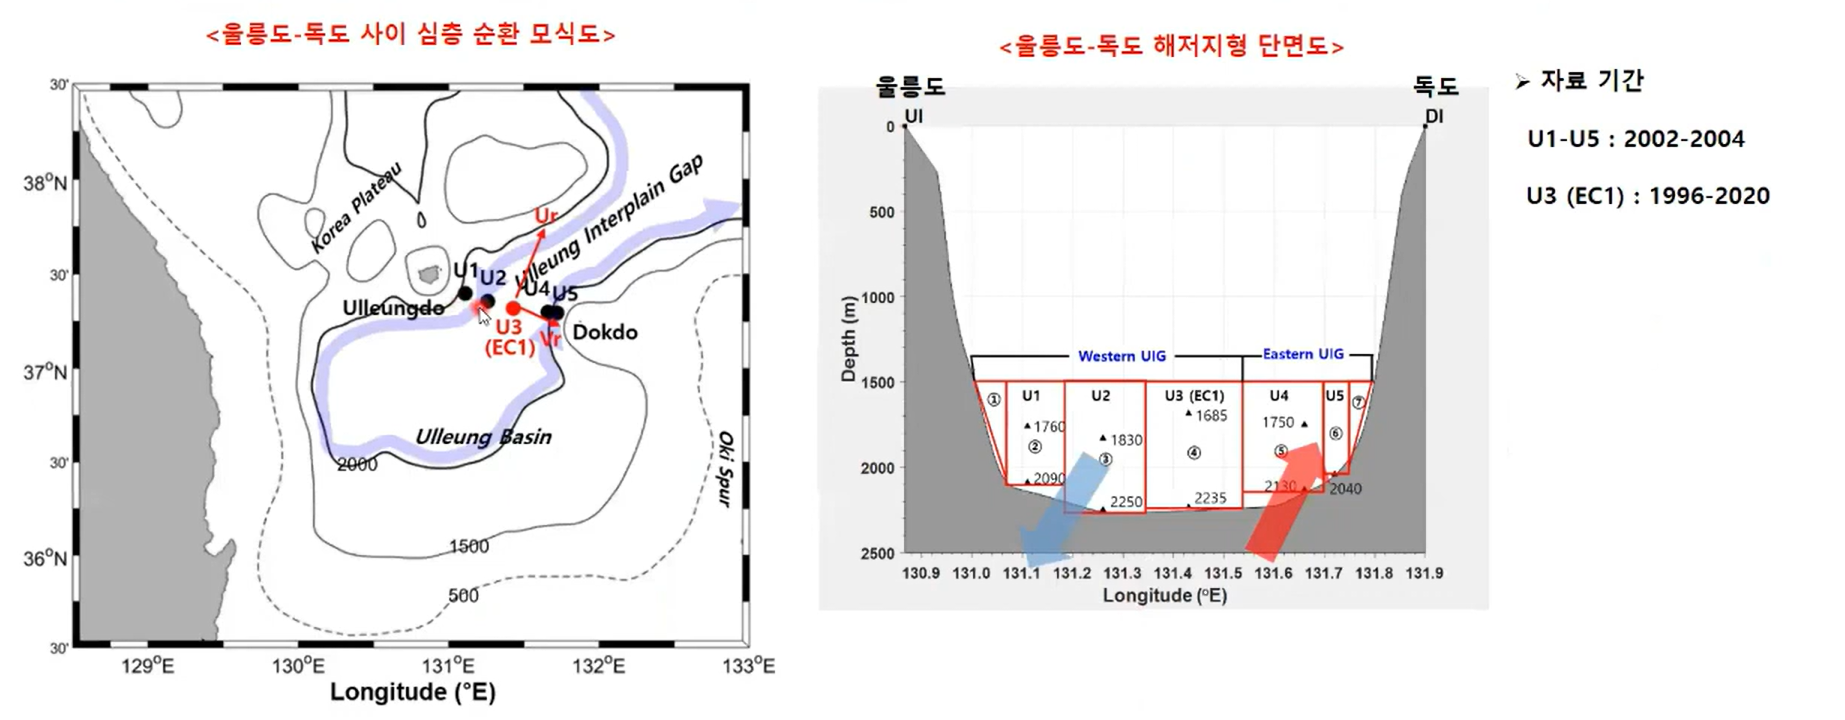

* 울릉도와 가까운 쪽 : 북 -> 남
* UB를 반시계 방향으로 돈다
* 독도와 가까운 쪽 : 북으로 흘러나감
***
* U1, U2, U3, U4, U5 : 수심에 따른 유속데이터를 얻은 지점
*** 

* Western UIG : 남쪽으로 흐르는 흐름이 유세
* Eastern UIG : 북쪽으로 흐르는 흐름이 유세

# Data Load

In [4]:
U3 = pd.read_csv('./data/1996년부터 2020년까지 U3(EC1)의 데이터.csv')
U1_5 = pd.read_excel('./data/2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls', sheet_name = None)
UIG_topography = pd.read_excel('./data/2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls', sheet_name = 'UIG_topography')
UIG_station = pd.read_excel('./data/2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls', sheet_name = 'UIG.station')
UIG_U1a = pd.read_excel('./data/2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls', sheet_name = 'UIG.U1a')
UIG_U1b = pd.read_excel('./data/2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls', sheet_name = 'UIG.U1b')
UIG_U2a = pd.read_excel('./data/2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls', sheet_name = 'UIG.U2a')
UIG_U2b = pd.read_excel('./data/2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls', sheet_name = 'UIG.U2b')
UIG_U3a = pd.read_excel('./data/2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls', sheet_name = 'UIG.U3a')
UIG_U3b = pd.read_excel('./data/2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls', sheet_name = 'UIG.U3b')
UIG_U4a = pd.read_excel('./data/2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls', sheet_name = 'UIG.U4a')
UIG_U4b = pd.read_excel('./data/2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls', sheet_name = 'UIG.U4b')
UIG_U5a = pd.read_excel('./data/2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls', sheet_name = 'UIG.U5a')

In [5]:
U3.head()
UIG_topography.head()
UIG_station.head()
UIG_U1a.head()
UIG_U1b.head()
UIG_U2a.head()
UIG_U2b.head()
UIG_U3a.head()
UIG_U3b.head()
UIG_U4a.head()
UIG_U4b.head()
UIG_U5a.head()

,Station,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,U3(EC1),1996,11,4,22,0,0,1800,-5.155066
1,U3(EC1),1996,11,4,23,0,0,1800,-4.947069
2,U3(EC1),1996,11,5,0,0,0,1800,-5.117618
3,U3(EC1),1996,11,5,1,0,0,1800,-5.379002
4,U3(EC1),1996,11,5,2,0,0,1800,-5.536037


,Longitude (°E),Depth (meter)
0,130.930214,0.00
1,130.934429,323.45
2,130.938643,428.52
3,130.942857,536.27
4,130.947071,644.44


,Station name,Longitude (°E),Latitude (°N)
0,U1,131.11,37.397933
1,U2,131.26,37.356567
2,U3(EC1),131.43,37.318933
3,U4,131.66,37.298867
4,U5,131.72,37.294683


,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,30,11,0,0,1760,0.000002
1,2002,11,30,12,0,0,1760,0.000015
2,2002,11,30,13,0,0,1760,0.000069
3,2002,11,30,14,0,0,1760,0.000218
4,2002,11,30,15,0,0,1760,0.000531


,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,30,11,0,0,2090,0.000003
1,2002,11,30,12,0,0,2090,0.000029
2,2002,11,30,13,0,0,2090,0.000136
3,2002,11,30,14,0,0,2090,0.000429
4,2002,11,30,15,0,0,2090,0.001044


,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,30,13,0,0,1830,-0.000004
1,2002,11,30,14,0,0,1830,-0.000035
2,2002,11,30,15,0,0,1830,-0.000148
3,2002,11,30,16,0,0,1830,-0.000406
4,2002,11,30,17,0,0,1830,-0.000832


,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,30,13,0,0,2250,0.000002
1,2002,11,30,14,0,0,2250,0.000018
2,2002,11,30,15,0,0,2250,0.000070
3,2002,11,30,16,0,0,2250,0.000163
4,2002,11,30,17,0,0,2250,0.000235


,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,29,17,0,0,1690,0.000003
1,2002,11,29,18,0,0,1690,0.000027
2,2002,11,29,19,0,0,1690,0.000133
3,2002,11,29,20,0,0,1690,0.000454
4,2002,11,29,21,0,0,1690,0.001238


,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,29,18,0,0,2240,-2.485203e-07
1,2002,11,29,19,0,0,2240,-2.358761e-06
2,2002,11,29,20,0,0,2240,-1.106792e-05
3,2002,11,29,21,0,0,2240,-3.492326e-05
4,2002,11,29,22,0,0,2240,-8.494837e-05


,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,29,11,0,0,1750,-0.000006
1,2002,11,29,12,0,0,1750,-0.000068
2,2002,11,29,13,0,0,1750,-0.000378
3,2002,11,29,14,0,0,1750,-0.001414
4,2002,11,29,15,0,0,1750,-0.004072


,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,29,9,0,0,2130,-0.000003
1,2002,11,29,10,0,0,2130,-0.000036
2,2002,11,29,11,0,0,2130,-0.000197
3,2002,11,29,12,0,0,2130,-0.000738
4,2002,11,29,13,0,0,2130,-0.002131


,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,28,14,0,0,2060,-0.000014
1,2002,11,28,15,0,0,2060,-0.000143
2,2002,11,28,16,0,0,2060,-0.000748
3,2002,11,28,17,0,0,2060,-0.002663
4,2002,11,28,18,0,0,2060,-0.007334


## 외부데이터 (습도, 기온, 수온)

In [6]:
data_2011 = pd.read_csv('./data/MARINE_BUOY_21229_HR_2011_2011_2018.csv',encoding = 'cp949')
data_2012 = pd.read_csv('./data/MARINE_BUOY_21229_HR_2012_2012_2015.csv',encoding = 'cp949')
data_2013 = pd.read_csv('./data/MARINE_BUOY_21229_HR_2013_2013_2015.csv',encoding = 'cp949')
data_2014 = pd.read_csv('./data/MARINE_BUOY_21229_HR_2014_2014_2015.csv',encoding = 'cp949')
data_2015 = pd.read_csv('./data/MARINE_BUOY_21229_HR_2015_2015_2018.csv',encoding = 'cp949')
data_2016 = pd.read_csv('./data/MARINE_BUOY_21229_HR_2016_2016_2018.csv',encoding = 'cp949')
data_2017 = pd.read_csv('./data/MARINE_BUOY_21229_HR_2017_2017_2018.csv',encoding = 'cp949')
data_2018 = pd.read_csv('./data/MARINE_BUOY_21229_HR_2018_2018_2019.csv',encoding = 'cp949')
data_2019 = pd.read_csv('./data/MARINE_BUOY_21229_HR_2019_2019_2020.csv',encoding = 'cp949')
data_2020 = pd.read_csv('./data/MARINE_BUOY_21229_HR_2020_2020_2021.csv',encoding = 'cp949')

In [118]:
data_2011.head()
data_2012.head()
data_2013.head()
data_2014.head()
data_2015.head()
data_2016.head()
data_2017.head()
data_2018.head()
data_2019.head()
data_2020.head()

,지점,일시,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,21229,2011-12-28 00:00,2.1,304,4.2,1031.0,45,6.2,11.9,3.7,2.2,1.1,6.4,103
1,21229,2011-12-28 01:00,4.5,293,6.9,1030.6,51,6.2,11.7,3.6,2.2,1.1,4.3,82
2,21229,2011-12-28 02:00,4.6,277,7.2,1030.4,42,6.5,12.4,3.4,2.1,1.0,4.9,206
3,21229,2011-12-28 03:00,3.2,285,6.0,1030.4,40,6.5,13.2,3.3,2.1,1.0,4.6,8
4,21229,2011-12-28 04:00,2.7,276,4.6,1030.5,41,6.7,13.3,2.6,1.9,1.0,9.1,37


,지점,일시,풍속1(m/s),풍향1(deg),GUST풍속 1(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,21229,2012-01-01 00:00,5.5,305,7.7,1020.7,42.0,8.6,15.4,2.5,1.5,0.7,4.3,203.0
1,21229,2012-01-01 01:00,5.0,293,7.1,1020.2,45.0,8.4,15.4,2.2,1.4,0.7,4.9,216.0
2,21229,2012-01-01 02:00,7.7,310,10.7,1020.0,51.0,8.7,15.3,2.0,1.3,0.7,4.6,154.0
3,21229,2012-01-01 03:00,6.6,296,9.7,1020.2,50.0,8.6,15.3,2.5,1.4,0.7,4.9,139.0
4,21229,2012-01-01 04:00,6.6,303,8.8,1019.7,48.0,8.7,15.3,2.4,1.4,0.7,5.3,153.0


,지점,일시,풍속1(m/s),풍향1(deg),GUST풍속 1(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,21229,2013-01-01 00:00,8.9,312.0,12.8,1017.0,47.0,3.1,13.0,4.5,NaN,NaN,NaN,NaN
1,21229,2013-01-01 01:00,9.0,297.0,12.7,1017.5,49.0,2.9,13.0,4.2,NaN,NaN,NaN,NaN
2,21229,2013-01-01 02:00,8.6,287.0,13.3,1017.2,55.0,2.6,13.0,4.4,NaN,NaN,NaN,NaN
3,21229,2013-01-01 03:00,7.8,328.0,13.0,1018.0,47.0,2.6,13.0,4.0,NaN,NaN,NaN,NaN
4,21229,2013-01-01 04:00,8.2,269.0,10.8,1018.0,48.0,2.8,13.0,4.1,NaN,NaN,NaN,NaN


,지점,일시,풍속1(m/s),풍향1(deg),GUST풍속 1(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,21229,2014-01-01 00:00,11.4,247.0,14.9,1007.2,48.0,10.2,14.4,3.7,2.1,1.5,5.8,176.0
1,21229,2014-01-01 01:00,11.6,247.0,15.9,1006.3,52.0,10.2,14.4,3.7,2.1,1.5,5.8,194.0
2,21229,2014-01-01 02:00,9.5,281.0,12.5,1006.3,42.0,9.9,14.5,3.2,2.2,1.6,5.8,147.0
3,21229,2014-01-01 03:00,11.6,293.0,15.4,1005.9,44.0,9.8,14.5,3.7,2.0,1.4,5.8,176.0
4,21229,2014-01-01 04:00,13.1,298.0,18.2,1006.5,49.0,9.2,14.5,4.4,2.6,1.8,5.8,171.0


,지점,일시,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,21229,2015-01-01 00:00,6.3,336.0,11.9,1010.7,96.0,0.2,13.5,3.0,2.3,1.7,7.1,147
1,21229,2015-01-01 01:00,12.1,302.0,18.1,1012.6,96.0,0.2,13.5,3.4,2.7,1.9,7.1,185
2,21229,2015-01-01 02:00,10.7,288.0,14.7,1012.1,96.0,-0.2,13.5,3.5,2.7,1.9,6.4,202
3,21229,2015-01-01 03:00,11.0,295.0,17.8,1011.8,84.0,1.1,13.5,3.9,2.6,1.8,7.1,179
4,21229,2015-01-01 04:00,14.1,298.0,23.3,1011.6,95.0,0.4,13.5,3.9,3.5,2.5,7.1,189


,지점,일시,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,21229,2016-01-01 00:00,1.0,118.0,2.5,1029.5,57.0,6.6,13.2,1.8,1.1,0.8,4.9,197.0
1,21229,2016-01-01 01:00,1.2,288.0,3.5,1029.3,51.0,7.0,13.1,1.5,1.0,0.7,5.8,225.0
2,21229,2016-01-01 02:00,1.7,276.0,3.3,1030.4,53.0,7.5,13.1,1.5,0.9,0.6,5.3,242.0
3,21229,2016-01-01 03:00,1.4,249.0,3.1,1029.5,54.0,7.5,13.1,1.4,1.0,0.7,4.9,248.0
4,21229,2016-01-01 04:00,2.0,229.0,3.7,1029.3,54.0,7.9,13.1,1.0,0.8,0.6,5.3,301.0


,지점,일시,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,21229,2017-01-01 00:00,4.8,261.0,6.9,1026.4,46,9.3,15.0,2.0,1.3,0.9,7.1,93.0
1,21229,2017-01-01 01:00,4.0,273.0,6.4,1025.9,48,9.3,15.0,2.0,1.1,0.8,7.1,97.0
2,21229,2017-01-01 02:00,5.6,290.0,7.9,1025.8,53,9.4,14.9,1.7,1.1,0.8,7.1,73.0
3,21229,2017-01-01 03:00,4.5,319.0,6.8,1026.1,50,9.4,14.9,1.8,1.1,0.8,7.1,67.0
4,21229,2017-01-01 04:00,4.7,271.0,7.1,1026.1,50,9.2,14.8,1.7,1.0,0.7,7.1,71.0


,지점,일시,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,21229,2018-01-01 00:00,10.3,330.0,14.0,1019.0,47.0,6.2,13.0,4.5,3.2,2.3,9.1,285.0
1,21229,2018-01-01 01:00,10.0,304.0,13.2,1019.2,48.0,5.9,13.0,5.3,3.3,2.3,9.1,313.0
2,21229,2018-01-01 02:00,9.8,304.0,14.8,1019.2,41.0,5.5,13.0,6.0,3.5,2.5,8.0,270.0
3,21229,2018-01-01 03:00,10.4,317.0,14.1,1019.0,50.0,5.8,12.9,4.9,3.4,2.4,9.1,272.0
4,21229,2018-01-01 04:00,11.3,320.0,15.0,1019.4,51.0,5.5,12.9,5.3,3.5,2.5,9.1,274.0


,지점,일시,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,21229,2019-01-01 00:00,4.6,249.0,8.4,1029.1,44,8.0,13.3,NaN,NaN,NaN,NaN,NaN
1,21229,2019-01-01 01:00,4.8,317.0,7.2,1028.6,46,7.5,13.3,NaN,NaN,NaN,NaN,NaN
2,21229,2019-01-01 02:00,6.1,317.0,8.3,1028.2,46,7.7,13.3,NaN,NaN,NaN,NaN,NaN
3,21229,2019-01-01 03:00,5.9,322.0,8.9,1028.5,50,7.3,13.3,NaN,NaN,NaN,NaN,NaN
4,21229,2019-01-01 04:00,6.8,315.0,9.2,NaN,49,7.2,13.3,NaN,NaN,NaN,NaN,NaN


,지점,일시,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,21229,2020-01-01 00:00,6.6,273,10.5,1026.4,51.0,3.7,13.7,3.4,2.2,1.6,9.1,42
1,21229,2020-01-01 02:00,7.5,275,10.6,1025.5,53.0,3.8,13.6,3.2,2.0,1.4,9.1,50
2,21229,2020-01-01 03:00,7.5,284,10.6,1025.5,56.0,4.1,13.5,3.4,2.1,1.5,8.0,48
3,21229,2020-01-01 04:00,4.9,315,7.4,1025.2,50.0,3.5,13.5,3.2,1.9,1.3,8.0,40
4,21229,2020-01-01 05:00,5.8,297,8.7,1024.7,54.0,3.6,13.6,2.8,1.8,1.3,8.0,31


In [119]:
data_external = pd.concat([data_2011,data_2012, data_2013, data_2014, data_2015, data_2016, data_2017, data_2018, data_2019, data_2020])

* 유속과 관련있는 열 뽑기

In [120]:
data_ex = data_external[['일시', '습도(%)','기온(°C)', '수온(°C)']]
data_ex = data_ex.reset_index()
data_ex = data_ex.iloc[:, 1:]
data_ex

,일시,습도(%),기온(°C),수온(°C)
0,2011-12-28 00:00,45.0,6.2,11.9
1,2011-12-28 01:00,51.0,6.2,11.7
2,2011-12-28 02:00,42.0,6.5,12.4
3,2011-12-28 03:00,40.0,6.5,13.2
4,2011-12-28 04:00,41.0,6.7,13.3
...,...,...,...,...
78208,2020-12-31 19:00,NaN,2.8,13.7
78209,2020-12-31 20:00,NaN,3.2,13.6
78210,2020-12-31 21:00,NaN,3.2,13.6
78211,2020-12-31 22:00,NaN,3.6,13.6


# Preprocessing

* 각 데이터에 있는 날짜들을 datetime 형식으로 하나의 column 생성
* 각 데이터들의 날짜 및 시간들을 동일하게 맞춰줌
* 유속을 cm/s 단위에서 m/s 단위로 변경

## datetime 형식의 date 열 생성

In [121]:
cols_day = ['Year', 'Month', 'Day']
cols_time = ['Hour', 'Minute', 'Second']
cols_all = ['day', 'time']

U3['day'] = U3[cols_day].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
U3['time'] = U3[cols_time].apply(lambda row: ':'.join(row.values.astype(str)), axis=1)
U3['date'] = U3[cols_all].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

U3.drop(['day', 'time'], axis = 1, inplace = True)
U3['date'] = pd.to_datetime(U3['date'], format = '%Y-%m-%d %H:%M:%S')
U3

,Station,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date
0,U3(EC1),1996,11,4,22,0,0,1800,-5.155066,1996-11-04 22:00:00
1,U3(EC1),1996,11,4,23,0,0,1800,-4.947069,1996-11-04 23:00:00
2,U3(EC1),1996,11,5,0,0,0,1800,-5.117618,1996-11-05 00:00:00
3,U3(EC1),1996,11,5,1,0,0,1800,-5.379002,1996-11-05 01:00:00
4,U3(EC1),1996,11,5,2,0,0,1800,-5.536037,1996-11-05 02:00:00
...,...,...,...,...,...,...,...,...,...,...
210533,U3(EC1),2020,11,11,3,0,0,1800,-2.731514,2020-11-11 03:00:00
210534,U3(EC1),2020,11,11,4,0,0,1800,-0.510799,2020-11-11 04:00:00
210535,U3(EC1),2020,11,11,5,0,0,1800,-1.223895,2020-11-11 05:00:00
210536,U3(EC1),2020,11,11,6,0,0,1800,0.200796,2020-11-11 06:00:00


In [122]:
cols_day = ['Year', 'Month', 'Day']
cols_time = ['Hour', 'Minute', 'Second']
cols_all = ['day', 'time']

UIG_U1a['day'] = UIG_U1a[cols_day].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
UIG_U1a['time'] = UIG_U1a[cols_time].apply(lambda row: ':'.join(row.values.astype(str)), axis=1)
UIG_U1a['date'] = UIG_U1a[cols_all].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

UIG_U1a.drop(['day', 'time'], axis = 1, inplace = True)
UIG_U1a['date'] = pd.to_datetime(UIG_U1a['date'], format = '%Y-%m-%d %H:%M:%S')
UIG_U1a

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date
0,2002,11,30,11,0,0,1760,0.000002,2002-11-30 11:00:00
1,2002,11,30,12,0,0,1760,0.000015,2002-11-30 12:00:00
2,2002,11,30,13,0,0,1760,0.000069,2002-11-30 13:00:00
3,2002,11,30,14,0,0,1760,0.000218,2002-11-30 14:00:00
4,2002,11,30,15,0,0,1760,0.000531,2002-11-30 15:00:00
...,...,...,...,...,...,...,...,...,...
11852,2004,4,7,7,0,0,1760,-1.354307,2004-04-07 07:00:00
11853,2004,4,7,8,0,0,1760,-1.453586,2004-04-07 08:00:00
11854,2004,4,7,9,0,0,1760,-1.534507,2004-04-07 09:00:00
11855,2004,4,7,10,0,0,1760,-1.596332,2004-04-07 10:00:00


In [123]:
cols_day = ['Year', 'Month', 'Day']
cols_time = ['Hour', 'Minute', 'Second']
cols_all = ['day', 'time']

UIG_U1b['day'] = UIG_U1b[cols_day].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
UIG_U1b['time'] = UIG_U1b[cols_time].apply(lambda row: ':'.join(row.values.astype(str)), axis=1)
UIG_U1b['date'] = UIG_U1b[cols_all].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

UIG_U1b.drop(['day', 'time'], axis = 1, inplace = True)
UIG_U1b['date'] = pd.to_datetime(UIG_U1b['date'], format = '%Y-%m-%d %H:%M:%S')
UIG_U1b

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date
0,2002,11,30,11,0,0,2090,0.000003,2002-11-30 11:00:00
1,2002,11,30,12,0,0,2090,0.000029,2002-11-30 12:00:00
2,2002,11,30,13,0,0,2090,0.000136,2002-11-30 13:00:00
3,2002,11,30,14,0,0,2090,0.000429,2002-11-30 14:00:00
4,2002,11,30,15,0,0,2090,0.001044,2002-11-30 15:00:00
...,...,...,...,...,...,...,...,...,...
11854,2004,4,7,9,0,0,2090,-3.073552,2004-04-07 09:00:00
11855,2004,4,7,10,0,0,2090,-3.199265,2004-04-07 10:00:00
11856,2004,4,7,11,0,0,2090,-3.294538,2004-04-07 11:00:00
11857,2004,4,7,12,0,0,2090,-3.360076,2004-04-07 12:00:00


In [124]:
cols_day = ['Year', 'Month', 'Day']
cols_time = ['Hour', 'Minute', 'Second']
cols_all = ['day', 'time']

UIG_U2a['day'] = UIG_U2a[cols_day].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
UIG_U2a['time'] = UIG_U2a[cols_time].apply(lambda row: ':'.join(row.values.astype(str)), axis=1)
UIG_U2a['date'] = UIG_U2a[cols_all].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

UIG_U2a.drop(['day', 'time'], axis = 1, inplace = True)
UIG_U2a['date'] = pd.to_datetime(UIG_U2a['date'], format = '%Y-%m-%d %H:%M:%S')
UIG_U2a

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date
0,2002,11,30,13,0,0,1830,-0.000004,2002-11-30 13:00:00
1,2002,11,30,14,0,0,1830,-0.000035,2002-11-30 14:00:00
2,2002,11,30,15,0,0,1830,-0.000148,2002-11-30 15:00:00
3,2002,11,30,16,0,0,1830,-0.000406,2002-11-30 16:00:00
4,2002,11,30,17,0,0,1830,-0.000832,2002-11-30 17:00:00
...,...,...,...,...,...,...,...,...,...
11841,2004,4,6,22,0,0,1830,-5.852380,2004-04-06 22:00:00
11842,2004,4,6,23,0,0,1830,-5.646616,2004-04-06 23:00:00
11843,2004,4,7,0,0,0,1830,-5.445145,2004-04-07 00:00:00
11844,2004,4,7,1,0,0,1830,-5.250342,2004-04-07 01:00:00


In [125]:
cols_day = ['Year', 'Month', 'Day']
cols_time = ['Hour', 'Minute', 'Second']
cols_all = ['day', 'time']

UIG_U2b['day'] = UIG_U2b[cols_day].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
UIG_U2b['time'] = UIG_U2b[cols_time].apply(lambda row: ':'.join(row.values.astype(str)), axis=1)
UIG_U2b['date'] = UIG_U2b[cols_all].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

UIG_U2b.drop(['day', 'time'], axis = 1, inplace = True)
UIG_U2b['date'] = pd.to_datetime(UIG_U2b['date'], format = '%Y-%m-%d %H:%M:%S')
UIG_U2b

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date
0,2002,11,30,13,0,0,2250,0.000002,2002-11-30 13:00:00
1,2002,11,30,14,0,0,2250,0.000018,2002-11-30 14:00:00
2,2002,11,30,15,0,0,2250,0.000070,2002-11-30 15:00:00
3,2002,11,30,16,0,0,2250,0.000163,2002-11-30 16:00:00
4,2002,11,30,17,0,0,2250,0.000235,2002-11-30 17:00:00
...,...,...,...,...,...,...,...,...,...
11851,2004,4,7,8,0,0,2250,-5.257820,2004-04-07 08:00:00
11852,2004,4,7,9,0,0,2250,-5.112829,2004-04-07 09:00:00
11853,2004,4,7,10,0,0,2250,-4.983541,2004-04-07 10:00:00
11854,2004,4,7,11,0,0,2250,-4.868813,2004-04-07 11:00:00


In [126]:
cols_day = ['Year', 'Month', 'Day']
cols_time = ['Hour', 'Minute', 'Second']
cols_all = ['day', 'time']

UIG_U3a['day'] = UIG_U3a[cols_day].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
UIG_U3a['time'] = UIG_U3a[cols_time].apply(lambda row: ':'.join(row.values.astype(str)), axis=1)
UIG_U3a['date'] = UIG_U3a[cols_all].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

UIG_U3a.drop(['day', 'time'], axis = 1, inplace = True)
UIG_U3a['date'] = pd.to_datetime(UIG_U3a['date'], format = '%Y-%m-%d %H:%M:%S')
UIG_U3a

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date
0,2002,11,29,17,0,0,1690,0.000003,2002-11-29 17:00:00
1,2002,11,29,18,0,0,1690,0.000027,2002-11-29 18:00:00
2,2002,11,29,19,0,0,1690,0.000133,2002-11-29 19:00:00
3,2002,11,29,20,0,0,1690,0.000454,2002-11-29 20:00:00
4,2002,11,29,21,0,0,1690,0.001238,2002-11-29 21:00:00
...,...,...,...,...,...,...,...,...,...
11870,2004,4,7,7,0,0,1690,-0.388759,2004-04-07 07:00:00
11871,2004,4,7,8,0,0,1690,-0.405883,2004-04-07 08:00:00
11872,2004,4,7,9,0,0,1690,-0.427643,2004-04-07 09:00:00
11873,2004,4,7,10,0,0,1690,-0.452804,2004-04-07 10:00:00


In [127]:
cols_day = ['Year', 'Month', 'Day']
cols_time = ['Hour', 'Minute', 'Second']
cols_all = ['day', 'time']

UIG_U3b['day'] = UIG_U3b[cols_day].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
UIG_U3b['time'] = UIG_U3b[cols_time].apply(lambda row: ':'.join(row.values.astype(str)), axis=1)
UIG_U3b['date'] = UIG_U3b[cols_all].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

UIG_U3b.drop(['day', 'time'], axis = 1, inplace = True)
UIG_U3b['date'] = pd.to_datetime(UIG_U3b['date'], format = '%Y-%m-%d %H:%M:%S')
UIG_U3b

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date
0,2002,11,29,18,0,0,2240,-2.485203e-07,2002-11-29 18:00:00
1,2002,11,29,19,0,0,2240,-2.358761e-06,2002-11-29 19:00:00
2,2002,11,29,20,0,0,2240,-1.106792e-05,2002-11-29 20:00:00
3,2002,11,29,21,0,0,2240,-3.492326e-05,2002-11-29 21:00:00
4,2002,11,29,22,0,0,2240,-8.494837e-05,2002-11-29 22:00:00
...,...,...,...,...,...,...,...,...,...
4496,2003,6,5,2,0,0,2240,-2.564173e+00,2003-06-05 02:00:00
4497,2003,6,5,3,0,0,2240,-2.545127e+00,2003-06-05 03:00:00
4498,2003,6,5,4,0,0,2240,-2.523660e+00,2003-06-05 04:00:00
4499,2003,6,5,5,0,0,2240,-2.501657e+00,2003-06-05 05:00:00


## 데이터 동일하게 맞추기 위해 공통된 행만 추출

* 1996년부터 2020년까지의 U3 데이터도 같이 맞춰준 뒤 U3_1800이라 지정

In [128]:
UIG_U1a = UIG_U1a[UIG_U1a['date'].isin(UIG_U2a['date'])].reset_index(drop=True)
UIG_U3a = UIG_U3a[UIG_U3a['date'].isin(UIG_U2a['date'])].reset_index(drop=True)

U3_1800 = U3[U3['date'].isin(UIG_U2a['date'])].reset_index(drop=True)

UIG_U1a
UIG_U2a
UIG_U3a
U3_1800

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date
0,2002,11,30,13,0,0,1760,0.000069,2002-11-30 13:00:00
1,2002,11,30,14,0,0,1760,0.000218,2002-11-30 14:00:00
2,2002,11,30,15,0,0,1760,0.000531,2002-11-30 15:00:00
3,2002,11,30,16,0,0,1760,0.001077,2002-11-30 16:00:00
4,2002,11,30,17,0,0,1760,0.001919,2002-11-30 17:00:00
...,...,...,...,...,...,...,...,...,...
11841,2004,4,6,22,0,0,1760,0.106519,2004-04-06 22:00:00
11842,2004,4,6,23,0,0,1760,-0.092469,2004-04-06 23:00:00
11843,2004,4,7,0,0,0,1760,-0.283257,2004-04-07 00:00:00
11844,2004,4,7,1,0,0,1760,-0.465926,2004-04-07 01:00:00


,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date
0,2002,11,30,13,0,0,1830,-0.000004,2002-11-30 13:00:00
1,2002,11,30,14,0,0,1830,-0.000035,2002-11-30 14:00:00
2,2002,11,30,15,0,0,1830,-0.000148,2002-11-30 15:00:00
3,2002,11,30,16,0,0,1830,-0.000406,2002-11-30 16:00:00
4,2002,11,30,17,0,0,1830,-0.000832,2002-11-30 17:00:00
...,...,...,...,...,...,...,...,...,...
11841,2004,4,6,22,0,0,1830,-5.852380,2004-04-06 22:00:00
11842,2004,4,6,23,0,0,1830,-5.646616,2004-04-06 23:00:00
11843,2004,4,7,0,0,0,1830,-5.445145,2004-04-07 00:00:00
11844,2004,4,7,1,0,0,1830,-5.250342,2004-04-07 01:00:00


,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date
0,2002,11,30,13,0,0,1690,0.389712,2002-11-30 13:00:00
1,2002,11,30,14,0,0,1690,0.415690,2002-11-30 14:00:00
2,2002,11,30,15,0,0,1690,0.436642,2002-11-30 15:00:00
3,2002,11,30,16,0,0,1690,0.452170,2002-11-30 16:00:00
4,2002,11,30,17,0,0,1690,0.461982,2002-11-30 17:00:00
...,...,...,...,...,...,...,...,...,...
11841,2004,4,6,22,0,0,1690,-0.536117,2004-04-06 22:00:00
11842,2004,4,6,23,0,0,1690,-0.494862,2004-04-06 23:00:00
11843,2004,4,7,0,0,0,1690,-0.458230,2004-04-07 00:00:00
11844,2004,4,7,1,0,0,1690,-0.427169,2004-04-07 01:00:00


,Station,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s),date
0,U3(EC1),2002,11,30,13,0,0,1800,0.422855,2002-11-30 13:00:00
1,U3(EC1),2002,11,30,14,0,0,1800,NaN,2002-11-30 14:00:00
2,U3(EC1),2002,11,30,15,0,0,1800,0.298857,2002-11-30 15:00:00
3,U3(EC1),2002,11,30,16,0,0,1800,-0.224372,2002-11-30 16:00:00
4,U3(EC1),2002,11,30,17,0,0,1800,NaN,2002-11-30 17:00:00
...,...,...,...,...,...,...,...,...,...,...
11841,U3(EC1),2004,4,6,22,0,0,1800,0.484607,2004-04-06 22:00:00
11842,U3(EC1),2004,4,6,23,0,0,1800,NaN,2004-04-06 23:00:00
11843,U3(EC1),2004,4,7,0,0,0,1800,NaN,2004-04-07 00:00:00
11844,U3(EC1),2004,4,7,1,0,0,1800,NaN,2004-04-07 01:00:00


In [129]:
UIG_U1b = UIG_U1b[UIG_U1b['date'].isin(UIG_U2a['date'])].reset_index(drop=True)
UIG_U2b = UIG_U2b[UIG_U2b['date'].isin(UIG_U2a['date'])].reset_index(drop=True)
UIG_U3b = UIG_U3b[UIG_U3b['date'].isin(UIG_U2a['date'])].reset_index(drop=True)

## 유속 단위 변경

In [130]:
UIG_U1a['Ur Current speed (m/s)'] = UIG_U1a['Ur Current speed (cm/s)']/100

UIG_U1b['Ur Current speed (m/s)'] = UIG_U1b['Ur Current speed (cm/s)']/100

UIG_U2a['Ur Current speed (m/s)'] = UIG_U2a['Ur Current speed (cm/s)']/100

UIG_U2b['Ur Current speed (m/s)'] = UIG_U2b['Ur Current speed (cm/s)']/100

UIG_U3a['Ur Current speed (m/s)'] = UIG_U3a['Ur Current speed (cm/s)']/100

UIG_U3b['Ur Current speed (m/s)'] = UIG_U3b['Ur Current speed (cm/s)']/100

U3['Ur Current speed (m/s)'] = U3['Ur Current speed (cm/s)']/100

U3_1800['Ur Current speed (m/s)'] = U3_1800['Ur Current speed (cm/s)']/100

## 결측치 처리

,u1_Ur(m/s),u2_Ur(m/s),u3_Ur(m/s),u3_02-04_Ur(m/s)
0,6.916409e-07,-4.011419e-08,0.003897,0.004229
1,2.182376e-06,-3.515237e-07,0.004157,NaN
2,5.308476e-06,-1.480414e-06,0.004366,0.002989
3,1.077437e-05,-4.062355e-06,0.004522,-0.002244
4,1.918553e-05,-8.322120e-06,0.004620,NaN
...,...,...,...,...
11841,1.065187e-03,-5.852380e-02,-0.005361,0.004846
11842,-9.246915e-04,-5.646616e-02,-0.004949,NaN
11843,-2.832570e-03,-5.445145e-02,-0.004582,NaN
11844,-4.659258e-03,-5.250342e-02,-0.004272,NaN


<AxesSubplot:>

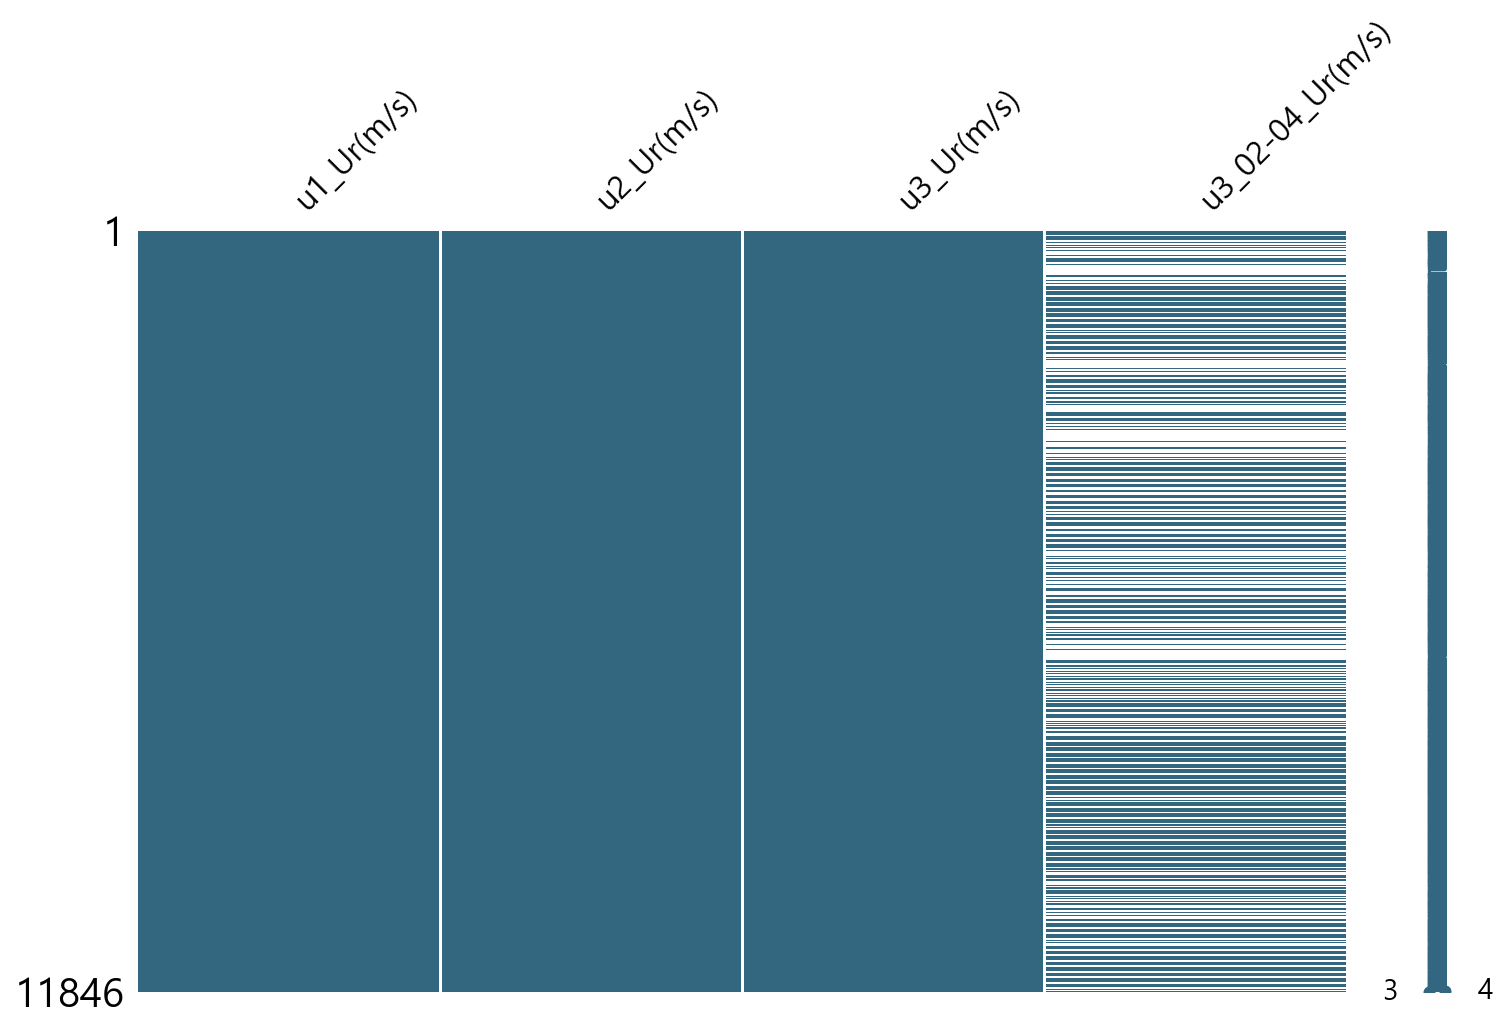

In [131]:
df_ur_nan = pd.concat([UIG_U1a['Ur Current speed (m/s)'], UIG_U2a['Ur Current speed (m/s)'], 
                         UIG_U3a['Ur Current speed (m/s)'], U3_1800['Ur Current speed (m/s)']], axis=1)
df_ur_nan.columns = ['u1_Ur(m/s)', 'u2_Ur(m/s)', 'u3_Ur(m/s)', 'u3_02-04_Ur(m/s)']

df_ur_nan

msno.matrix(df_ur_nan, figsize = (12, 7), color = (0.2, 0.4, 0.5))

### 모든 구간 nan값 처리

In [132]:
UIG_U1a['Ur Current speed (m/s)'] = UIG_U1a['Ur Current speed (m/s)'].interpolate(method="linear")
UIG_U1b['Ur Current speed (m/s)'] = UIG_U1b['Ur Current speed (m/s)'].interpolate(method="linear")
UIG_U2a['Ur Current speed (m/s)'] = UIG_U2a['Ur Current speed (m/s)'].interpolate(method="linear")
UIG_U2b['Ur Current speed (m/s)'] = UIG_U2b['Ur Current speed (m/s)'].interpolate(method="linear")
UIG_U3a['Ur Current speed (m/s)'] = UIG_U3a['Ur Current speed (m/s)'].interpolate(method="linear")
UIG_U3b['Ur Current speed (m/s)'] = UIG_U3b['Ur Current speed (m/s)'].interpolate(method="linear")
U3_1800['Ur Current speed (m/s)'] = U3_1800['Ur Current speed (m/s)'].interpolate(method="linear")

## 외부 데이터 nan값 처리

In [133]:
data_ex['습도(%)'] = data_ex['습도(%)'].interpolate(method="linear")
data_ex['기온(°C)'] = data_ex['기온(°C)'].interpolate(method="linear")
data_ex['수온(°C)'] = data_ex['수온(°C)'].interpolate(method="linear")